In [1]:
# Importation des packages necessaires

import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris

In [2]:
# Chargement du dataset

iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [5]:
# Creation de la matrice de liaision pour fusionner les donnees avec l'attribut "ward" qui vise a minimiser la variance intra cluster
Z = linkage(df, method = "ward")

In [6]:
print("Matrice de liaison")
Z

Matrice de liaison


array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

**chaque ligne de la matrice de liaison représente une fusion entre deux clusters, et chaque colonne de la matrice a une signification spécifique :**

- *Colonne 0 : L'index du premier cluster fusionné.*

- *Colonne 1 : L'index du second cluster fusionné.*

- *Colonne 2 : La distance entre les deux clusters fusionnés.*

- *Colonne 3 : Le nombre de points dans le nouveau cluster formé par cette fusion.*

Chaque ligne de la matrice représente donc une étape de l'algorithme de clustering hiérarchique où deux clusters sont fusionnés. Le processus continue jusqu'à ce qu'il ne reste plus qu'un seul cluster englobant tous les points.

Essaye de visualiser ces fusions dans le dendrogramme, c’est fascinant de voir comment les clusters se forment étape par étape! 📊🚀

les attributs de linkage sont: ward, single, complete, average, centroid, median, weigheit,

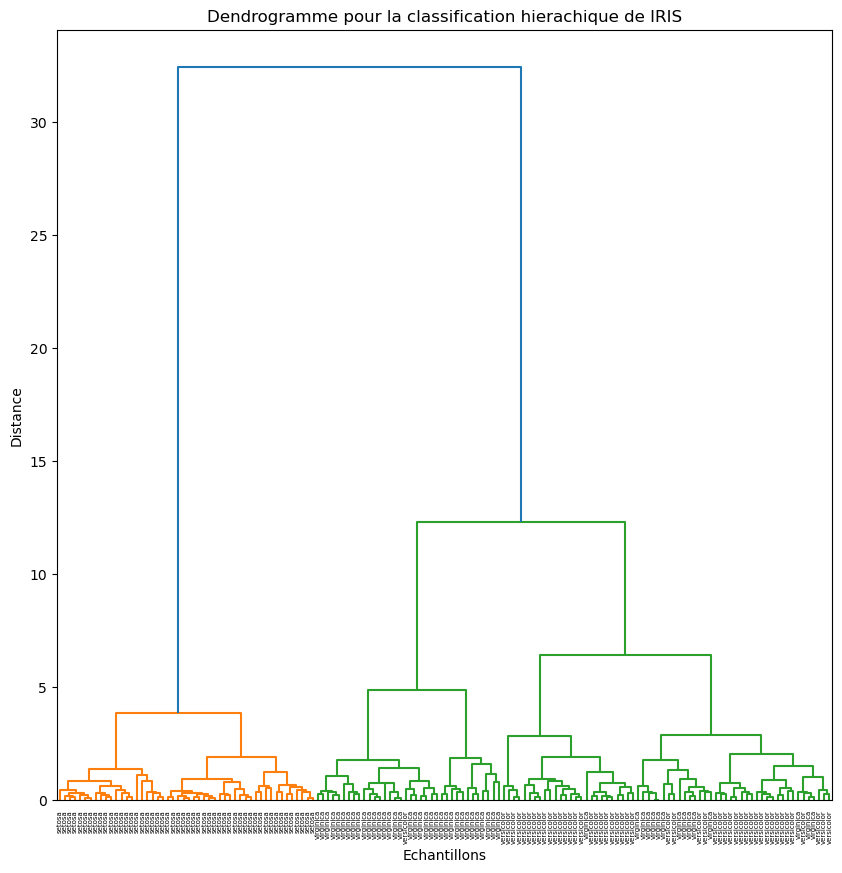

In [7]:
plt.figure(figsize = (10, 10))
dendrogram(Z, labels = iris.target_names[iris.target])
plt.title("Dendrogramme pour la classification hierachique de IRIS")
plt.xlabel("Echantillons")
plt.ylabel("Distance")
plt.show()

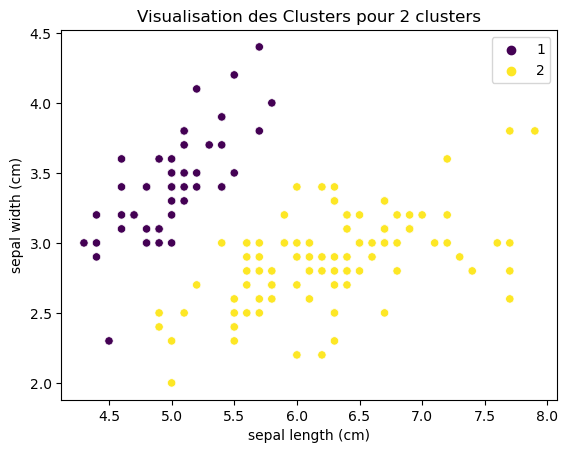

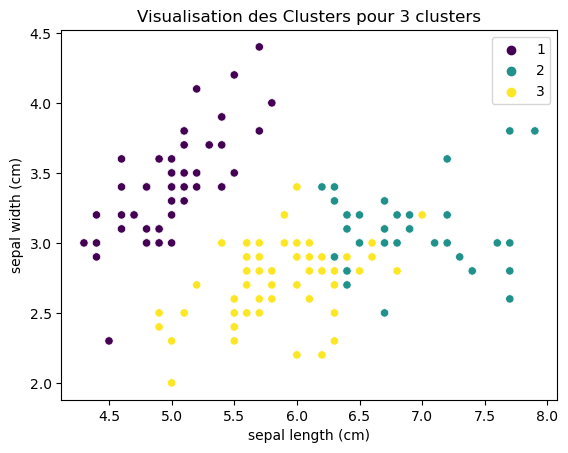

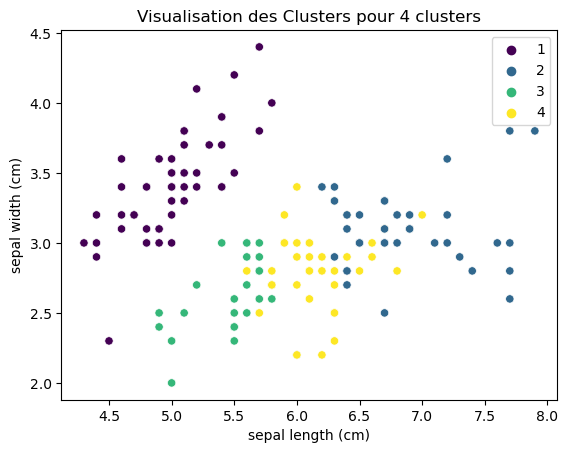

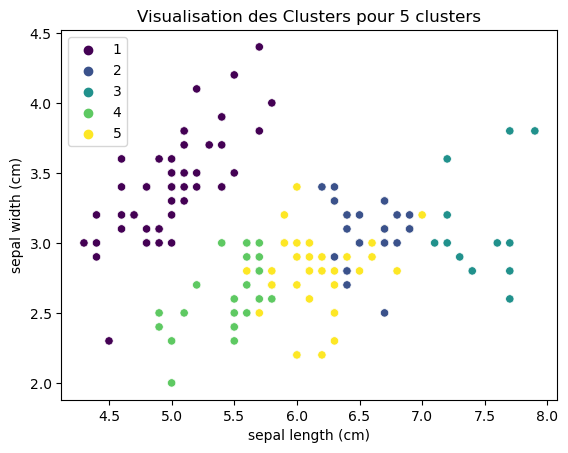

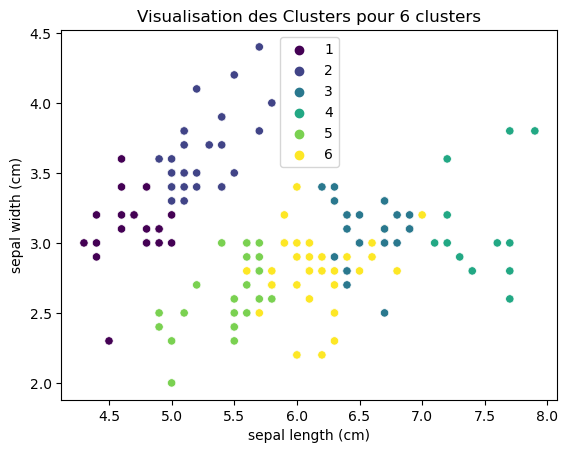

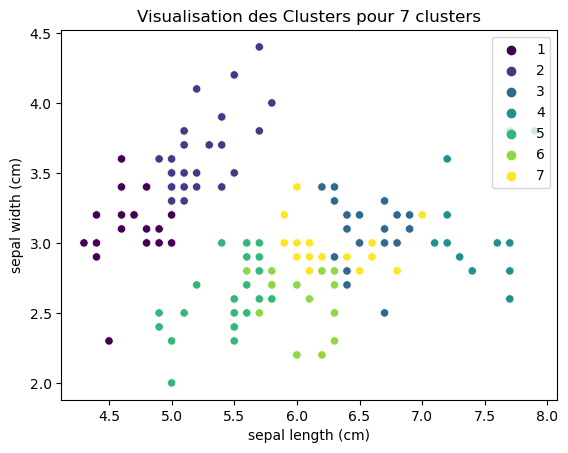

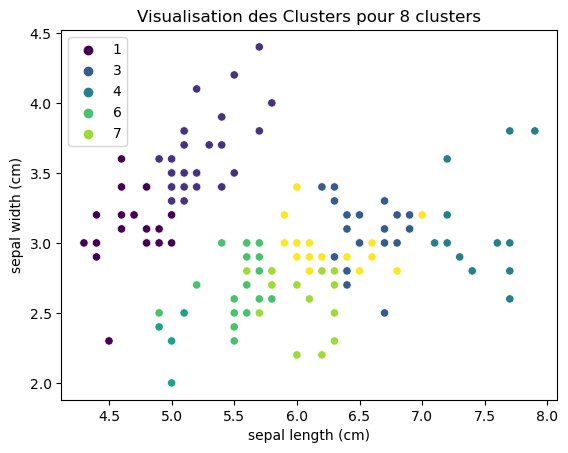

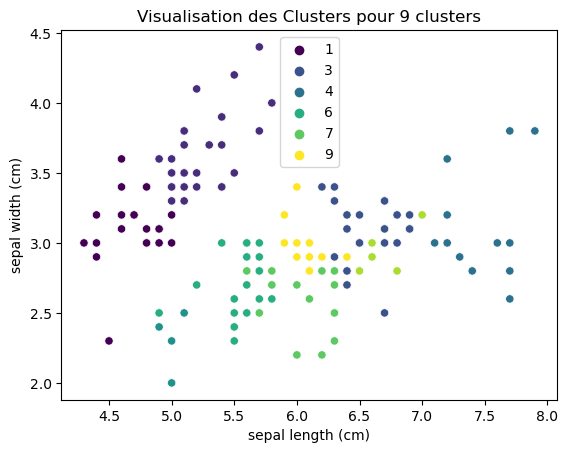

In [8]:
# Visualisation du clustering

import seaborn as sns

for n_clusters in range(2, 10):
    labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=labels, palette='viridis')
    plt.title(f'Visualisation des Clusters pour {n_clusters} clusters')
    plt.show()


In [9]:
"""Le but de l'evaluation ici n'est pas d'evaluer la qualité finale du cluster obtenu ce qui serait inutile mais plutot la qualité des sous groupe obtenu a chaque iteration"""

# Coefficient de silhouette
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 15):
    labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(df, labels)
    print(f'Nombre de clusters: {n_clusters}, Indice de Silhouette: {silhouette_avg}')

Nombre de clusters: 2, Indice de Silhouette: 0.6867350732769777
Nombre de clusters: 3, Indice de Silhouette: 0.5543236611296419
Nombre de clusters: 4, Indice de Silhouette: 0.4889670857554692
Nombre de clusters: 5, Indice de Silhouette: 0.4843825892790594
Nombre de clusters: 6, Indice de Silhouette: 0.35923761926030806
Nombre de clusters: 7, Indice de Silhouette: 0.34220719366204994
Nombre de clusters: 8, Indice de Silhouette: 0.34359065991195353
Nombre de clusters: 9, Indice de Silhouette: 0.3304886352874657
Nombre de clusters: 10, Indice de Silhouette: 0.29253860430301254
Nombre de clusters: 11, Indice de Silhouette: 0.2885604093459299
Nombre de clusters: 12, Indice de Silhouette: 0.2702168059117986
Nombre de clusters: 13, Indice de Silhouette: 0.25422926710361193
Nombre de clusters: 14, Indice de Silhouette: 0.261620924243142


In [10]:
# Coefficient cophénétique

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(df))
print(f'Coefficient cophénétique: {c}')

Coefficient cophénétique: 0.8728283153305715
